In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


In [3]:
fdiry = file.path(FD_RES, "model_linear", )
dir(fdiry)

[1] "distance"             "example"              "example_interactive" 
 [4] "interactive_filter95" "marginal_filter95"    "tmp_old_v1"          
 [7] "tmp_old_v2"           "tmp_old_v3"           "tmp_summary"         
[10] "tmp_test"

In [9]:
fdiry = file.path(FD_RES, "model_linear", "tmp_summary")
fname = "res_interactive_chr17.rds"
fpath = file.path(fdiry, fname)
lst_res = readRDS(fpath)

In [10]:
lst_motif_pair = head(names(lst_res))
list(lst_motif_pair)

[[1]]
[1] "AIRE|AP1/1"      "AIRE|AP1/2"      "AIRE|BATF"       "AIRE|BCL6/1"    
[5] "AIRE|BCL6/2"     "AIRE|CCAAT/CEBP"

In [11]:
dat_motif_pair = names(lst_res)
dat_motif_pair = sapply(dat_motif_pair, function(x){
    res = str_split(string = x, pattern = "\\|", simplify = TRUE)
    return(res)
})
dat_motif_pair = as.data.frame(t(dat_motif_pair))
colnames(dat_motif_pair) = c("motif1", "motif2")
head(dat_motif_pair)

,motif1,motif2
,<chr>,<chr>
AIRE|AP1/1,AIRE,AP1/1
AIRE|AP1/2,AIRE,AP1/2
AIRE|BATF,AIRE,BATF
AIRE|BCL6/1,AIRE,BCL6/1
AIRE|BCL6/2,AIRE,BCL6/2
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP


In [14]:
lst_res["AIRE|AP1/1"]

$`AIRE|AP1/1`

Call:
lm(formula = y ~ X + 0)

Residuals:
   Min     1Q Median     3Q    Max 
    NA     NA     NA     NA     NA 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
X(Intercept)           9.257e-04  1.327e-05  69.742  < 2e-16 ***
XXTFX_DMSO_AIRE       -9.173e-04  1.991e-05 -46.074  < 2e-16 ***
XXTFX_DMSO_AP1/1       8.729e-04  1.991e-05  43.844  < 2e-16 ***
XXTFX_Dex_AIRE        -1.051e-06  2.099e-05  -0.050     0.96    
XXTFX_Dex_AP1/1        1.976e-04  2.099e-05   9.416 3.56e-09 ***
XXTFX_DMSO_AIRE_AP1/1 -8.793e-04  2.893e-05 -30.395  < 2e-16 ***
XXTFX_Dex_AIRE_AP1/1  -1.965e-04  3.635e-05  -5.407 1.98e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.968e-05 on 22 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9992 
F-statistic:  5378 on 7 and 22 DF,  p-value: < 2.2e-16



In [15]:
pval = lapply(lst_res, function(res){
    res = coef(res)
    if (nrow(res) < 7){
        return(NA)
    } else {
        return(res[7, 4])
    }
})

In [16]:
unlist(head(pval)) %>% class

[1] "numeric"

In [20]:
tmp = dat_motif_pair
tmp$pval      = unlist(pval)
tmp$nlogp     = -log10(tmp$pval)
tmp$pval_adj  = p.adjust(tmp$pval, method = "BH")
tmp$nlogp_adj = -log10(tmp$pval_adj)
head(tmp)

,motif1,motif2,pval,nlogp,pval_adj,nlogp_adj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AIRE|AP1/1,AIRE,AP1/1,1.977743e-05,4.7038301,0.0001867289,3.7287885
AIRE|AP1/2,AIRE,AP1/2,5.895865e-01,0.2294525,0.6501180857,0.1870078
AIRE|BATF,AIRE,BATF,NA,NA,NA,NA
AIRE|BCL6/1,AIRE,BCL6/1,NA,NA,NA,NA
AIRE|BCL6/2,AIRE,BCL6/2,NA,NA,NA,NA
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP,NA,NA,NA,NA


In [45]:
mat = tmp %>% dplyr::select(motif1, motif2, nlogp_adj) %>% spread(motif2, nlogp_adj)
mat = column_to_rownames(mat, var = "motif1")

idx = colnames(mat)
mat = mat[idx,]
mat[is.na(mat)] = 0
mat = mat + t(mat)
mat_ori = mat
head(mat_ori)

,AP1/1,AP1/2,BATF,BCL6/1,BCL6/2,CCAAT/CEBP,CENBP,CREB/ATF/1,CREB/ATF/2,CREB/ATF/3,⋯,ZNF586,ZNF667,ZNF680,ZNF708,ZNF713,ZNF768,ZNF784,ZNF85,ZSCAN3,ZSCAN4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP1/1,0.000000,3.3555173,3.3755830,3.7784843,5.035480,3.7044649,3.2334220,2.7768649,3.88130815,3.7558823,⋯,3.90287322,4.8847284,4.0135544,4.0504891,1.8238880,1.1241880,4.2414006,4.26170237,3.965498,3.5056228
AP1/2,3.355517,0.0000000,0.2845015,0.1575165,1.048517,0.1876699,0.4269005,0.5554869,0.03480939,0.3272490,⋯,0.07782166,0.6536952,0.0577060,0.4877188,0.1994717,0.2308886,0.0319438,0.03502624,1.897019,0.2949104
BATF,3.375583,0.2845015,0.0000000,0.0000000,3.993491,0.8823426,1.5216002,0.0000000,0.00000000,0.7337605,⋯,0.00000000,1.2433980,0.2338209,1.2362555,0.0000000,0.4384238,1.3104293,0.10968526,1.894250,0.0000000
BCL6/1,3.778484,0.1575165,0.0000000,0.0000000,4.969279,0.0000000,0.0000000,0.0000000,4.58869684,0.0000000,⋯,0.00000000,1.5509238,0.0000000,1.3082898,0.0000000,0.4894918,3.0161380,0.00000000,1.985089,0.0000000
BCL6/2,5.035480,1.0485170,3.9934911,4.9692788,0.000000,4.7855630,2.3799657,4.2424641,6.19278076,4.6139517,⋯,0.96705156,3.5193139,3.8365077,2.8011537,4.9925344,1.2449445,5.3177388,5.94991125,1.799958,4.1329944
CCAAT/CEBP,3.704465,0.1876699,0.8823426,0.0000000,4.785563,0.0000000,0.0000000,0.0000000,4.43640408,0.4406840,⋯,0.00000000,1.4362434,0.0000000,0.7406646,0.0000000,0.4787818,2.2306567,0.20882151,2.014781,0.6998837


In [54]:
idx = apply(mat_ori, 1, mean)
idx = (idx > 3)
mat_fil = mat_ori[idx, idx]
print(dim(mat_fil))
print(which(colnames(mat_fil) == "NFKB/2"))
print(which(colnames(mat_fil) == "NFKB/3"))
head(mat_fil)

[1] 13 13
integer(0)
[1] 6


,AP1/1,BCL6/2,CREB/ATF/2,FOX/4,FOX/7,NFKB/3,NFY,NR/13,NR/15,NR/20,RFX/3,RUNX/1,ZIC/2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP1/1,0.000000,5.035480,3.881308,4.575289,5.173828,3.873821,0.2371330,4.626945,4.581383,9.349632,4.659174,3.984663,5.723258
BCL6/2,5.035480,0.000000,6.192781,6.852799,5.455703,8.523900,5.3249586,8.106042,5.749764,10.097226,4.955101,6.082977,7.124618
CREB/ATF/2,3.881308,6.192781,0.000000,6.590222,5.360320,7.894803,4.7378808,5.460037,3.384412,10.395342,4.988148,6.539785,7.995113
FOX/4,4.575289,6.852799,6.590222,0.000000,5.024669,8.197689,6.5823621,4.105273,5.176401,10.395342,4.538758,6.841180,7.334123
FOX/7,5.173828,5.455703,5.360320,5.024669,0.000000,5.189489,0.3007809,4.979211,5.619513,10.386962,4.173504,5.325079,4.934608
NFKB/3,3.873821,8.523900,7.894803,8.197689,5.189489,0.000000,6.2155164,9.649677,5.591684,10.395342,5.285231,5.511920,8.354866


In [46]:
idx = apply(mat_ori, 1, mean)
idx = (idx > 3)
mat_fil = mat_ori[idx, idx]
print(dim(mat_fil))
print(which(colnames(mat_fil) == "NR/20"))
print(which(colnames(mat_fil) == "AP1/1"))
head(mat_fil)

[1] 13 13
[1] 10
[1] 1


,AP1/1,BCL6/2,CREB/ATF/2,FOX/4,FOX/7,NFKB/3,NFY,NR/13,NR/15,NR/20,RFX/3,RUNX/1,ZIC/2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP1/1,0.000000,5.035480,3.881308,4.575289,5.173828,3.873821,0.2371330,4.626945,4.581383,9.349632,4.659174,3.984663,5.723258
BCL6/2,5.035480,0.000000,6.192781,6.852799,5.455703,8.523900,5.3249586,8.106042,5.749764,10.097226,4.955101,6.082977,7.124618
CREB/ATF/2,3.881308,6.192781,0.000000,6.590222,5.360320,7.894803,4.7378808,5.460037,3.384412,10.395342,4.988148,6.539785,7.995113
FOX/4,4.575289,6.852799,6.590222,0.000000,5.024669,8.197689,6.5823621,4.105273,5.176401,10.395342,4.538758,6.841180,7.334123
FOX/7,5.173828,5.455703,5.360320,5.024669,0.000000,5.189489,0.3007809,4.979211,5.619513,10.386962,4.173504,5.325079,4.934608
NFKB/3,3.873821,8.523900,7.894803,8.197689,5.189489,0.000000,6.2155164,9.649677,5.591684,10.395342,5.285231,5.511920,8.354866


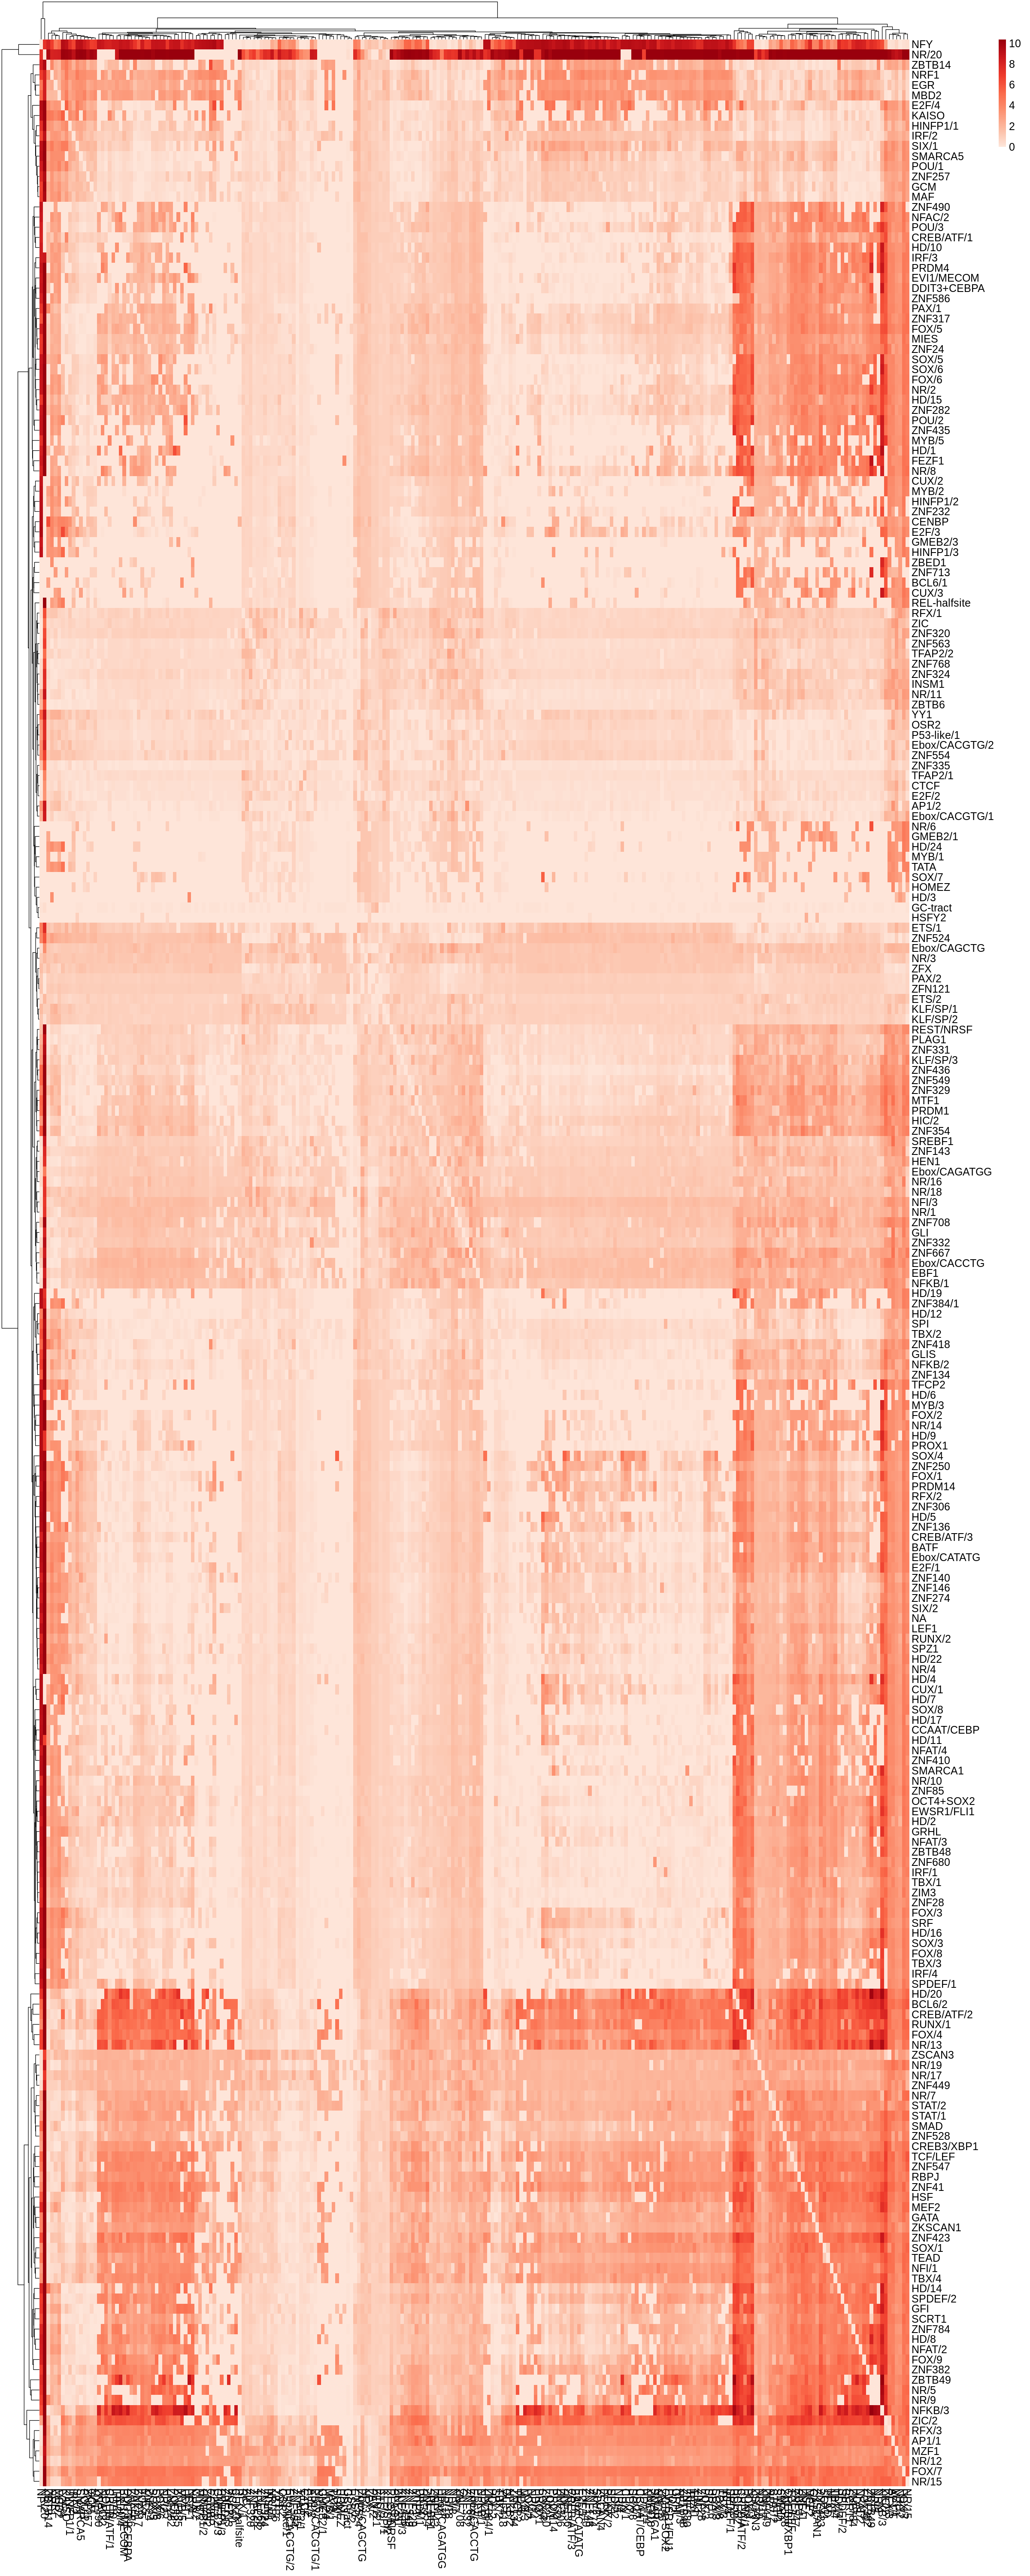

In [53]:
options(repr.plot.width=20, repr.plot.height=50)
out = pheatmap(
    mat_ori, 
    fontsize = 15, 
    color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))

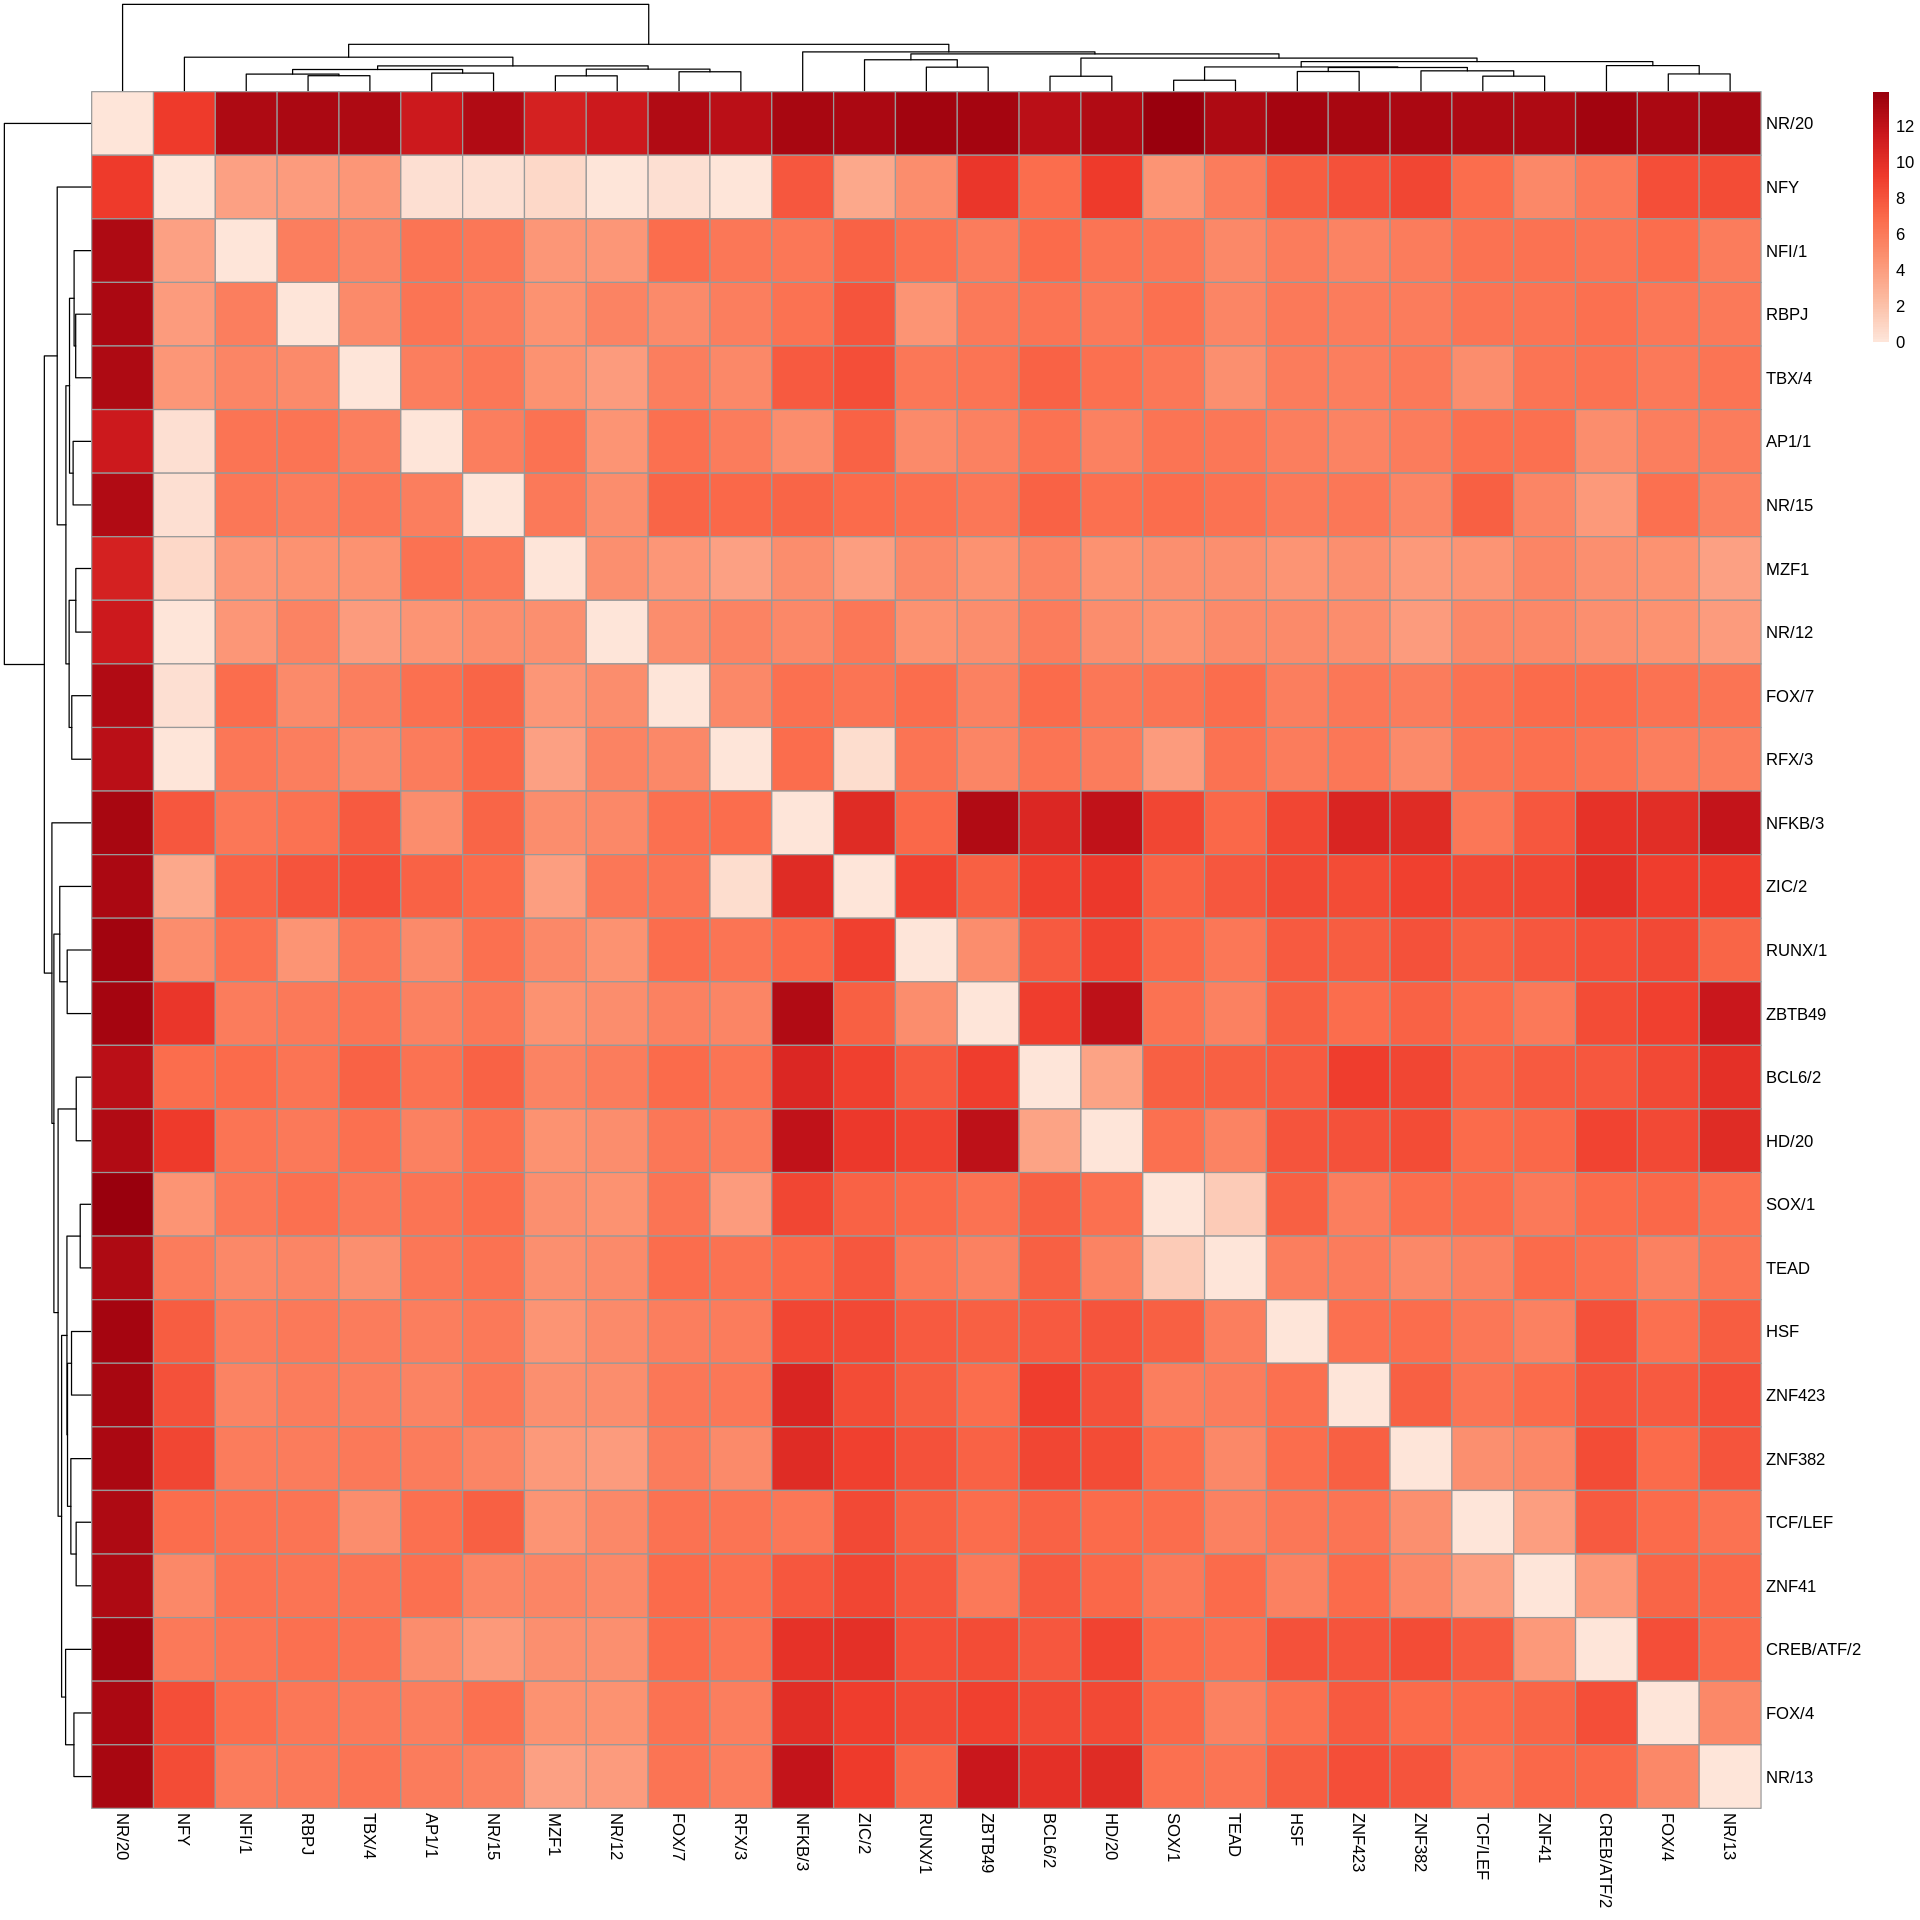

In [32]:
options(repr.plot.width=16, repr.plot.height=16)
out = pheatmap(
    mat_fil, 
    fontsize = 10,
    color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))

In [33]:
print(length(idx))
print(which(colnames(mat_fil)[out$tree_col[["order"]]] == "NR_20"))

[1] 241
integer(0)


In [34]:
tmp = mat_fil[out$tree_row[["order"]], "NR_20", drop=FALSE]
tmp 

ERROR: Error in `[.data.frame`(mat_fil, out$tree_row[["order"]], "NR_20", drop = FALSE): undefined columns selected


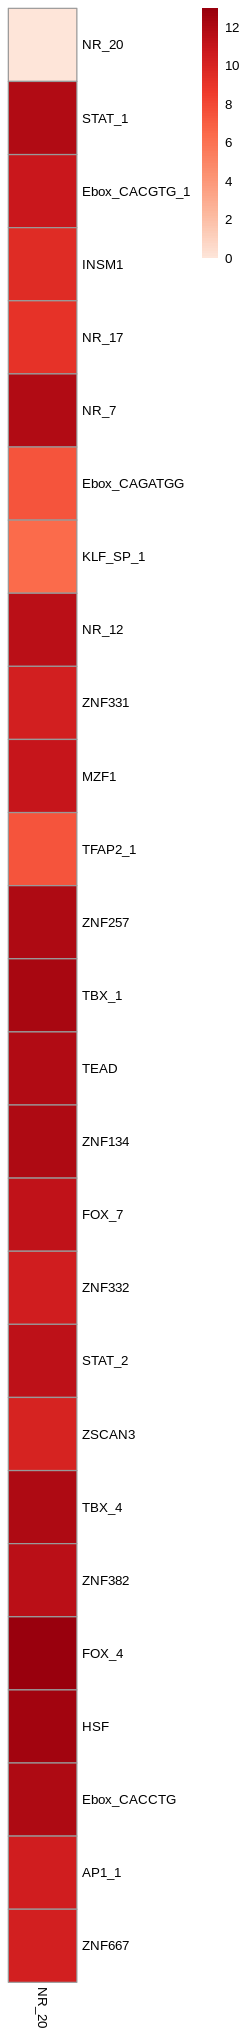

In [21]:
options(repr.plot.width=2, repr.plot.height=17)
pheatmap(mat_fil[out$tree_row[["order"]], "NR_20", drop=FALSE], 
         cluster_cols = FALSE, cluster_rows = FALSE,
         fontsize = 8,
         color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))